In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score

In [2]:
# Create your connection.
conn = sqlite3.connect('C:\\Users\\zabiulla.khan\\Projects\\soccer\\database.sqlite')
soccer_data = pd.read_sql("select * from Player_Attributes", conn)
soccer_data.sample(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
93505,93506,202857,208230,2016-04-28 00:00:00,82.0,84.0,right,high,high,78.0,...,78.0,57.0,28.0,30.0,33.0,10.0,12.0,7.0,11.0,10.0
105912,105913,155813,33636,2010-02-22 00:00:00,75.0,84.0,right,low,medium,56.0,...,58.0,79.0,71.0,76.0,82.0,8.0,20.0,58.0,20.0,20.0
44079,44080,210016,361778,2014-11-14 00:00:00,72.0,75.0,right,medium,medium,58.0,...,74.0,66.0,40.0,52.0,50.0,15.0,10.0,6.0,14.0,10.0
40690,40691,657,40563,2012-08-31 00:00:00,74.0,76.0,left,medium,high,71.0,...,75.0,71.0,66.0,73.0,71.0,5.0,8.0,9.0,8.0,6.0
165807,165808,190813,161328,2011-08-30 00:00:00,73.0,87.0,right,medium,low,72.0,...,68.0,69.0,26.0,38.0,34.0,7.0,10.0,12.0,8.0,10.0
36581,36582,137410,24793,2015-02-06 00:00:00,74.0,74.0,right,medium,medium,34.0,...,29.0,40.0,75.0,75.0,75.0,5.0,7.0,7.0,4.0,9.0
79734,79735,213991,466672,2015-11-26 00:00:00,72.0,81.0,right,medium,high,71.0,...,66.0,58.0,62.0,76.0,72.0,16.0,14.0,11.0,7.0,9.0
9785,9786,176858,38162,2013-05-31 00:00:00,67.0,67.0,right,medium,medium,41.0,...,51.0,50.0,68.0,65.0,61.0,6.0,8.0,10.0,15.0,15.0
130706,130707,176035,38257,2013-02-15 00:00:00,67.0,67.0,right,low,high,48.0,...,66.0,45.0,64.0,69.0,67.0,8.0,11.0,15.0,12.0,15.0
4717,4718,103935,27694,2013-08-16 00:00:00,81.0,84.0,right,medium,medium,78.0,...,86.0,75.0,54.0,68.0,62.0,15.0,15.0,7.0,6.0,13.0


In [3]:
#Exploratory Data Analysis : Cleaning, Correcting and Visualizing
soccer_data.shape

(183978, 42)

In [4]:
soccer_data.columns 

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [5]:
# which columns to keep ?  all except first four 
new_soccer_data = soccer_data.copy()
new_soccer_data = new_soccer_data.drop(["id", "player_fifa_api_id", "player_api_id", "date"], axis = 1)
new_soccer_data.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
new_soccer_data.duplicated().any()

True

In [7]:
# removing the duplicates   
new_soccer_data = new_soccer_data.drop_duplicates()
new_soccer_data.shape

(138440, 38)

In [8]:
new_soccer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138440 entries, 0 to 183977
Data columns (total 38 columns):
overall_rating         138439 non-null float64
potential              138439 non-null float64
preferred_foot         138439 non-null object
attacking_work_rate    136628 non-null object
defensive_work_rate    138439 non-null object
crossing               138439 non-null float64
finishing              138439 non-null float64
heading_accuracy       138439 non-null float64
short_passing          138439 non-null float64
volleys                136958 non-null float64
dribbling              138439 non-null float64
curve                  136958 non-null float64
free_kick_accuracy     138439 non-null float64
long_passing           138439 non-null float64
ball_control           138439 non-null float64
acceleration           138439 non-null float64
sprint_speed           138439 non-null float64
agility                136958 non-null float64
reactions              138439 non-null float64

In [9]:
new_soccer_data.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000,136958.000000,138439.000000,136958.000000,138439.000000,...,136958.000000,138439.000000,138439.00000,138439.000000,136958.000000,138439.000000,138439.000000,138439.000000,138439.000000,138439.000000
mean,69.295061,73.996923,55.524643,50.194331,57.772940,62.962149,49.890959,59.483469,53.319543,49.783175,...,58.517283,55.459061,47.33016,50.929081,48.510397,14.951271,16.334595,21.822911,16.406453,16.741020
std,6.861178,6.552489,17.462248,19.284744,16.782279,14.300325,18.543740,17.972028,18.490113,18.073022,...,15.199206,15.752390,21.56854,21.762017,21.907442,17.305276,16.278454,22.209866,16.526526,17.642358
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,65.000000,69.000000,46.000000,34.000000,50.000000,58.000000,36.000000,52.000000,41.000000,37.000000,...,50.000000,46.000000,25.00000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,60.000000,53.000000,60.000000,66.000000,53.000000,64.000000,56.000000,51.000000,...,61.000000,57.000000,52.00000,57.000000,54.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,74.000000,78.000000,68.000000,66.000000,69.000000,72.000000,64.000000,72.000000,68.000000,64.000000,...,69.000000,67.000000,67.00000,70.000000,68.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,...,97.000000,96.000000,96.00000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [10]:
new_soccer_data.isnull().sum()

overall_rating            1
potential                 1
preferred_foot            1
attacking_work_rate    1812
defensive_work_rate       1
crossing                  1
finishing                 1
heading_accuracy          1
short_passing             1
volleys                1482
dribbling                 1
curve                  1482
free_kick_accuracy        1
long_passing              1
ball_control              1
acceleration              1
sprint_speed              1
agility                1482
reactions                 1
balance                1482
shot_power                1
jumping                1482
stamina                   1
strength                  1
long_shots                1
aggression                1
interceptions             1
positioning               1
vision                 1482
penalties                 1
marking                   1
standing_tackle           1
sliding_tackle         1482
gk_diving                 1
gk_handling               1
gk_kicking          

In [11]:
new_soccer_data['preferred_foot'].value_counts()

right    104645
left      33794
Name: preferred_foot, dtype: int64

In [12]:
new_soccer_data['preferred_foot'] = new_soccer_data['preferred_foot'].map({'right': 0, 'left': 1})

In [13]:
new_soccer_data['attacking_work_rate'].value_counts()

medium    93616
high      32798
low        6704
None       2959
norm        294
y           101
le           86
stoc         70
Name: attacking_work_rate, dtype: int64

In [14]:
new_soccer_data.replace(to_replace = ['None', 'y', 'le', 'stoc', 'norm'],value = 'medium', inplace = True)
new_soccer_data['attacking_work_rate'].value_counts()

medium    97126
high      32798
low        6704
Name: attacking_work_rate, dtype: int64

In [15]:
new_soccer_data['attacking_work_rate'] = new_soccer_data['attacking_work_rate'].map({'medium': 1, 'low': 0, 'high' : 2})

In [16]:
new_soccer_data['defensive_work_rate'].value_counts()

medium    97955
high      21351
low       13732
_0         1811
o          1345
1           337
ormal       294
2           251
3           192
7           173
5           161
6           159
0           154
9           117
es          101
4            93
ean          86
tocky        70
8            57
Name: defensive_work_rate, dtype: int64

In [17]:
new_soccer_data.replace(['_0', 'o', '1', 'ormal', '2', '3', '7', '5', '6', '0', '9', 'es', '4', 'ean', 'tocky', '8'], 'medium', inplace = True)

In [18]:
new_soccer_data['defensive_work_rate'] = new_soccer_data['defensive_work_rate'].map({'medium': 1, 'low': 0, 'high' : 2})

In [19]:
new_soccer_data.fillna(new_soccer_data.mean(), inplace = True)
new_soccer_data.isnull().any()

overall_rating         False
potential              False
preferred_foot         False
attacking_work_rate    False
defensive_work_rate    False
crossing               False
finishing              False
heading_accuracy       False
short_passing          False
volleys                False
dribbling              False
curve                  False
free_kick_accuracy     False
long_passing           False
ball_control           False
acceleration           False
sprint_speed           False
agility                False
reactions              False
balance                False
shot_power             False
jumping                False
stamina                False
strength               False
long_shots             False
aggression             False
interceptions          False
positioning            False
vision                 False
penalties              False
marking                False
standing_tackle        False
sliding_tackle         False
gk_diving              False
gk_handling   

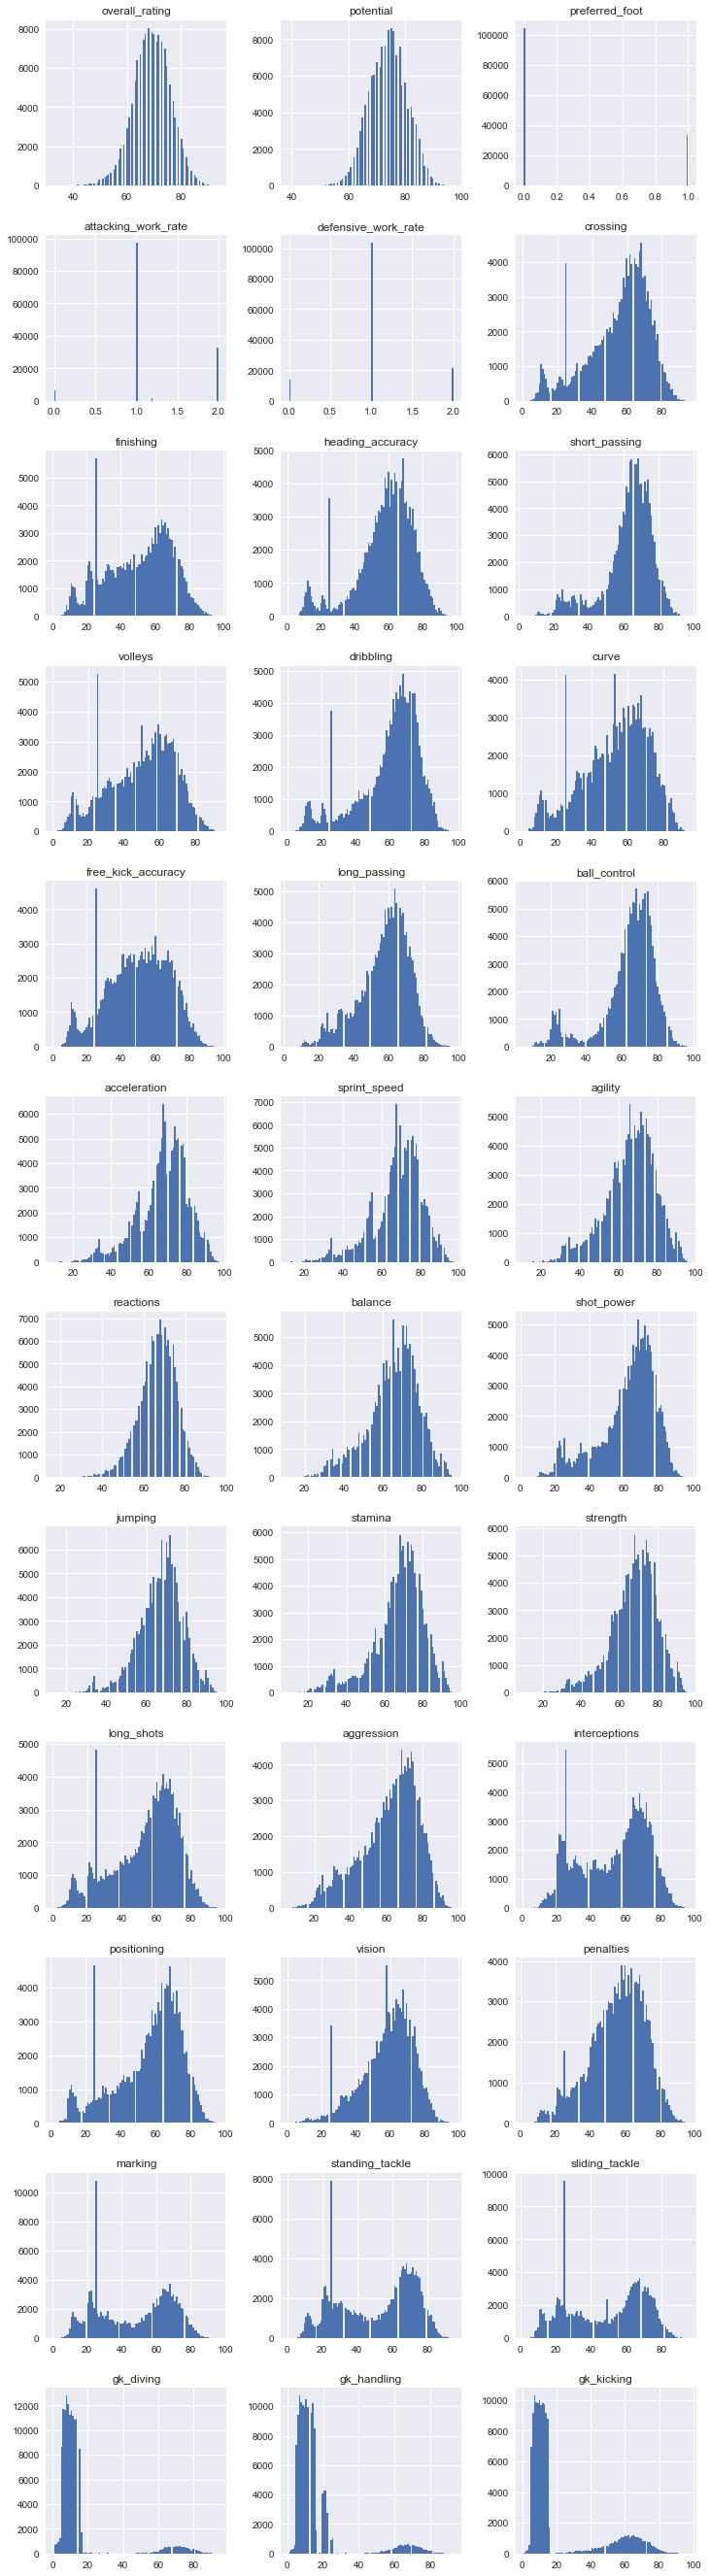

In [20]:
#Visualize the data
sns.set()

fig, axes = plt.subplots(len(new_soccer_data.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        new_soccer_data.hist(column = new_soccer_data.columns[i], bins = 100, ax=axis)
        i = i+1 
plt.show()

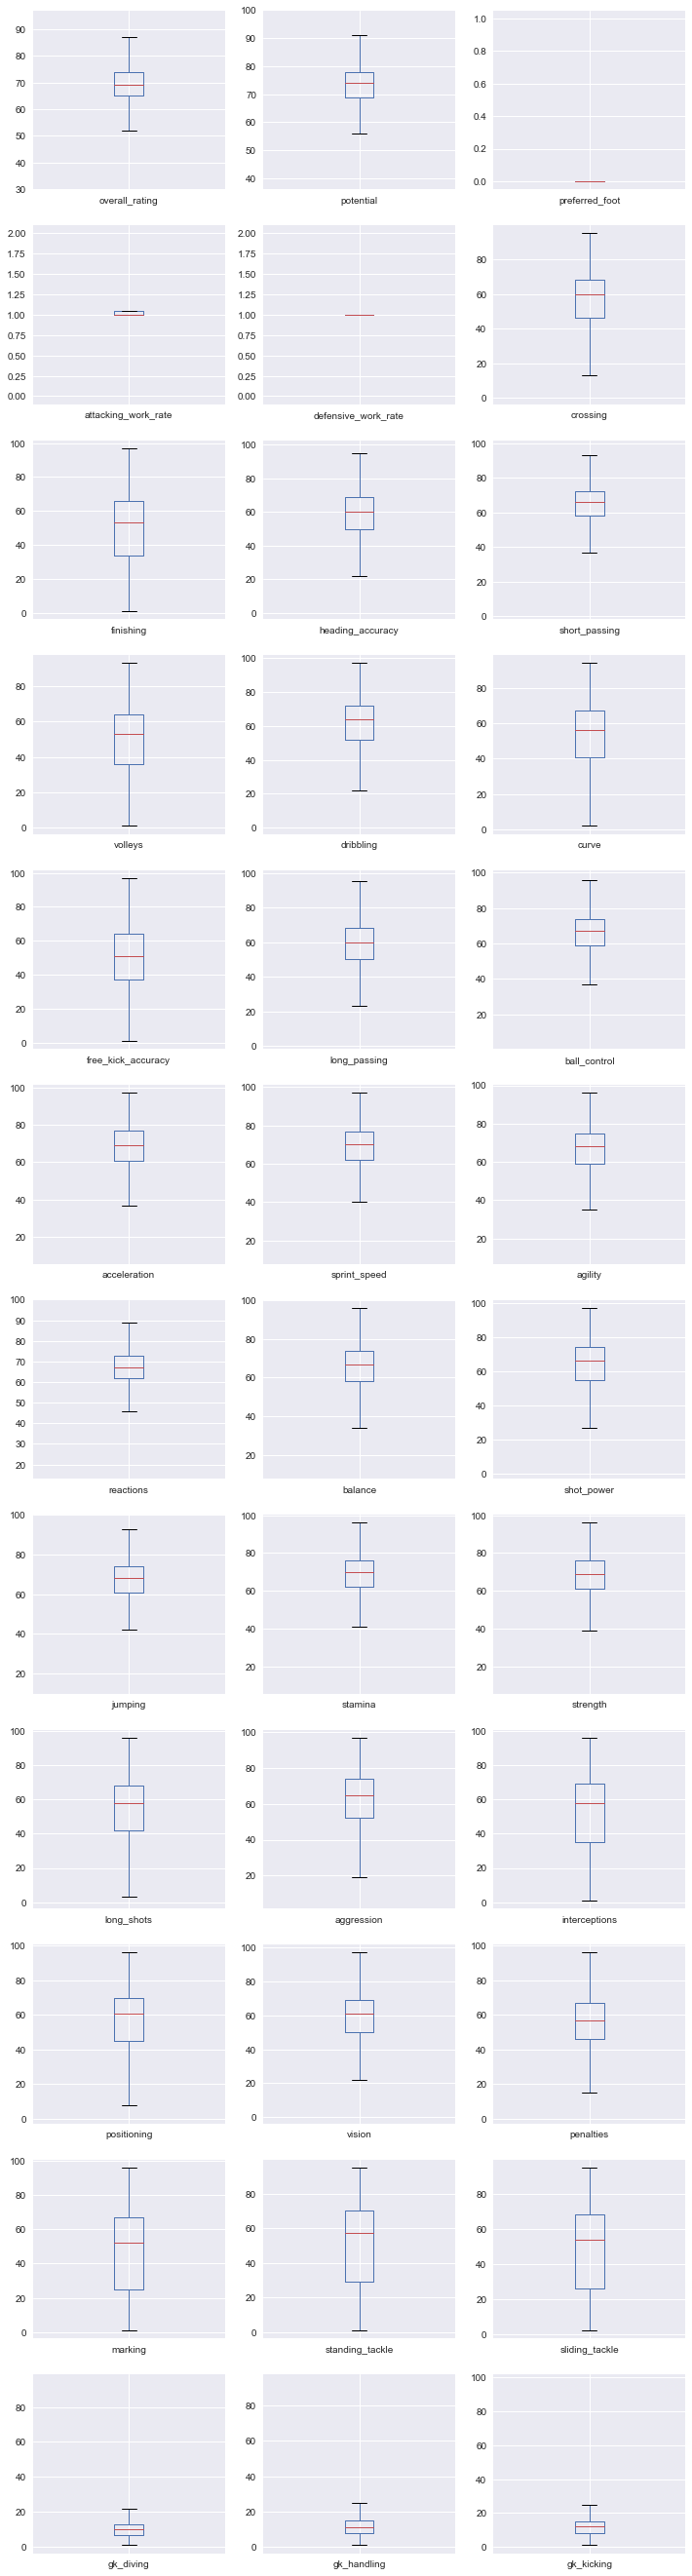

In [21]:
fig, axes = plt.subplots(len(new_soccer_data.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        new_soccer_data.boxplot(column = new_soccer_data.columns[i], ax=axis)
        i = i+1 
plt.show()

In [22]:
new_soccer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138440 entries, 0 to 183977
Data columns (total 38 columns):
overall_rating         138440 non-null float64
potential              138440 non-null float64
preferred_foot         138440 non-null float64
attacking_work_rate    138440 non-null float64
defensive_work_rate    138440 non-null float64
crossing               138440 non-null float64
finishing              138440 non-null float64
heading_accuracy       138440 non-null float64
short_passing          138440 non-null float64
volleys                138440 non-null float64
dribbling              138440 non-null float64
curve                  138440 non-null float64
free_kick_accuracy     138440 non-null float64
long_passing           138440 non-null float64
ball_control           138440 non-null float64
acceleration           138440 non-null float64
sprint_speed           138440 non-null float64
agility                138440 non-null float64
reactions              138440 non-null floa

In [23]:
#Feature Selection and Model Selection
columns = ['potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']
X = new_soccer_data[columns]
y = new_soccer_data['overall_rating']
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
fit = pca.fit(X_std)
X_new = pca.fit_transform(X_std)

In [25]:
fit.explained_variance_.sum()

36.65048325162951

In [26]:
lnr = LinearRegression()
print(cross_val_score(lnr, X_new, y,cv = 5).mean()) 

0.8310871169038434


In [27]:
rgs = DecisionTreeRegressor()
print(cross_val_score(rgs, X_new, y, cv = 5).mean())

0.8460335221140933


In [28]:
rfr = RandomForestRegressor(10)
print(cross_val_score(rfr, X_new, y, cv = 5).mean())

0.9229918968272643
